In [1]:
import numpy as np
import functools
from functools import reduce
from scipy.stats import kurtosis, skew
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Statistics with Functional Programming

In this exercise we will use imperative programming with Python to compute from a list of  N integers:

   - The mean - the first moment
   
   $\mu = \frac{1}{N} \sum_{i=1}^N x_i.$
        
        
  
   - The standard deviation - second moment
  
   $\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}$
        
        
        
   - The skew  - the third moment
   
   $\gamma_1 = \frac{1}{N} \sum_{i=1}^N \left[\frac{x_i - \mu}{\sigma}\right]^3$
        
        
        
   - The kurtosis - the fourth moment
  
   $\gamma_2 = \Big\{   \frac{1}{N} \sum_{i=1}^N \left[\frac{x_i - \mu}{\sigma}\right]^4  \Big\} - 3$
    

In [2]:
def test_assert():
    """Test that assert is working.

    Args:
        None
    Returns:
        x with value 5
    """
    x = 5
    assert x == 5
    return x
    
y = test_assert() 
assert y == 5

# Define test data set X

[ 0.44122749 -0.33087015  2.43077119 -0.25209213  0.10960984  1.58248112
 -0.9092324  -0.59163666  0.18760323 -0.32986996 -1.19276461 -0.20487651
 -0.35882895  0.6034716  -1.66478853 -0.70017904  1.15139101  1.85733101
 -1.51117956  0.64484751 -0.98060789 -0.85685315 -0.87187918 -0.42250793
  0.99643983  0.71242127  0.05914424 -0.36331088  0.00328884 -0.10593044
  0.79305332 -0.63157163 -0.00619491 -0.10106761 -0.05230815  0.24921766
  0.19766009  1.33484857 -0.08687561  1.56153229 -0.30585302 -0.47773142
  0.10073819  0.35543847  0.26961241  1.29196338  1.13934298  0.4944404
 -0.33633626 -0.10061435  1.41339802  0.22125412 -1.31077313 -0.68956523
 -0.57751323  1.15220477 -0.10716398  2.26010677  0.65661947  0.12480683
 -0.43570392  0.97217931 -0.24071114 -0.82412345  0.56813272  0.01275832
  1.18906073 -0.07359332 -2.85968797  0.7893664  -1.87774088  1.53875615
  1.82136474 -0.42703139 -1.16470191 -1.39707402  0.87265462 -0.20211818
 -0.59835993 -0.2434197   2.08851469  0.34691933  0.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


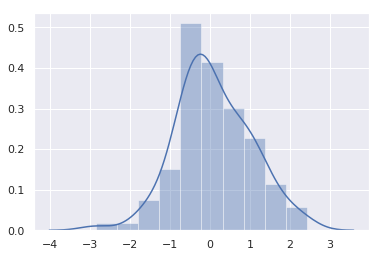

In [3]:
np.random.seed(5)
X = np.random.normal(size=100)
sns.set(color_codes=True)
sns.distplot(X)
print(X)


# First Moment

### Define a function, first_moment_term, to  compute the MEAN

 $\mu = \frac{1}{N} \sum_{i=1}^N x_i.$
 
 We will:
 
 1.  Map each term of the list to the correct moment
 2.  Sum the transformed elements over N
 

####  Define the transformation for the first moment terms 
    hint - it is the identity 

In [4]:
def first_moment_term(x):
    """Define the first moment term

    Args:
        x - An element of a list - a term
    Returns:
        transformed term - an identity in this case, x
    """
    # This is a helper function that, given a datapoint x, returns
    # the term that goes in the sum
    # This will be used in .map() below
    # You really don't need this when computing the mean (because the sum is
    # over just the x's themselves), but it is instructive
    return x

In [5]:
x = 1

new_term = first_moment_term(x)

print(new_term)

assert new_term == 1

1


In [6]:
def my_mean(my_list):
    """Define the first moment term

    Args:
        my_list - a list of integers
        
    Returns:
        the mean of the list
    """
    # first compute a list containing the terms
    terms = map(first_moment_term, my_list)
    
    # now sum the terms and divide by length to get the mean
    return reduce(lambda x,y: x+y, terms)/len(my_list)

In [7]:
#unit test
test_list = [1,2,3] 
mu = my_mean(test_list)
print(mu)
a = np.array([1,2,3])
assert mu == np.mean(a)

2.0


# Second Moment

### Define a function, second_moment_term, to compute the standard deviation

$\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}$
 
 We will:
 
 1.  Map each term of the list to the correct moment
 2.  Sum the transformed elements over N
 
 


####  Define the transformation for the first moment terms 

$(x_i - \mu)^2$
   

In [8]:
def second_moment_term(x, mu):
    """Define the second moment term

    Args:
        x - An element of a list - a term
        mu - the mean
    Returns:
        transformed term - an identity in this case, (x - mu)**2
    """
    # This is a helper function that will be used in the .map below
    return (x-mu)**2  

In [9]:
val = 5
mu = 3
term = second_moment_term(x, mu)
assert term == 4


### Transform and reduce to get the standard deviation


   $\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}$
   
    
   N = len(list)
   
   $\mu$ is the mean
   
   
##### Note:  Use Numpy for the square root  - 

      np.sqrt(x)
 

In [15]:
def my_stdev(my_list, mu):
    """Define the second moment

    Args:
        my_list - a list of integers
        mu - the mean of the list
        
    Returns:
        the standard deviation of the list
    """
    # compute a list that contains the terms
    # Note that I can't use `second_moment_term` helper function DIRECTLY
    # because it takes two arguments (x, mu)
    # map requires a function that takes only a single argument (x)
    # I will INDIRECTLY get what I need by calling it through a lambda that fills in mu for me    
    terms = map(lambda x: second_moment_term(x, mu), my_list)
    
    total = reduce(lambda x,y: x+y, terms)
    return np.sqrt(total/len(my_list))

In [16]:
test_list = [1,2,3] 
mu = my_mean(test_list)
print(mu)
sigma = my_stdev(test_list, mu)
print(sigma)
a = np.array([1,2,3])
assert mu == np.mean(a)
assert sigma == np.std(a)
print(np.std(a))

2.0
0.816496580927726
0.816496580927726


# Third Moment



## Define a function, third_moment_term, to compute the Skew

$\gamma_1 = \frac{1}{N} \sum_{i=1}^N \left[\frac{x_i - \mu}{\sigma}\right]^3$

We will:

Map each term of the list to the correct moment
Sum the transformed elements over N


In [17]:
def third_moment_term(x, mu, sigma):
    """Define the third moment term

    Args:
        x - An element of a list - a term
        mu - the mean
        sigma - the standard deviation
    Returns:
        transformed term - an identity in this case, ((x - mu)/sigma)**3
    """
    return ((x-mu)/sigma)**3

In [18]:
x = 5
mu = 3
sigma = 1
gamma_1 = third_moment_term(x, mu, sigma)
assert gamma_1 == 8

### Transform and reduce to obtain the skew


   $\gamma_1 = \frac{1}{N} \sum_{i=1}^N \left[\frac{x_i - \mu}{\sigma}\right]^3$
   
    
   N = len(list)
   
   $\mu$ is the mean
   
   
   $\sigma$ is the standard deviation
   
   

 

In [19]:
def my_skew(my_list, mu, sigma):
    """Compute the third moment, the skew

    Args:
        my_list - a list of integers
        mu - the mean of the list
        sigma - the standard deviation
        
    Returns:
        the skew of the list
    """
    # compute a list that contains the terms
    # Note that I can't use `third_moment_term` helper function DIRECTLY
    # because it takes three arguments (x, mu, sigma)
    # map requires a function that takes only a single argument (x)
    # I will INDIRECTLY get what I need by calling it through a 
    # lambda that fills in mu and sigma for me    
    terms = map(lambda x: third_moment_term(x, mu, sigma), my_list)
    
    total = reduce(lambda x,y: x+y, terms)
    return total/len(my_list)   

In [21]:
test_list = [1,2,3] 
mu = my_mean(test_list)
print(mu)
sigma = my_stdev(test_list, mu)
print(sigma)
gamma_1 = my_skew(test_list, mu, sigma)
print(gamma_1)
a = np.array([1,2,3])
assert mu == np.mean(a)
assert sigma == np.std(a)
assert gamma_1 == skew(a)
print(skew(a))

2.0
0.816496580927726
0.0
0.0


# Fourth Moment

## Define a function, fourth_moment_term, to compute the kurtosis

$\gamma_2 = \Big\{   \frac{1}{N} \sum_{i=1}^N \left[\frac{x_i - \mu}{\sigma}\right]^4  \Big\} - 3$

We will:

Map each term of the list to the correct moment
Sum the transformed elements over N

In [22]:
def fourth_moment_term(x, mu, sigma):
    """Define the fourth moment term

    Args:
        x - An element of a list - a term
        mu - the mean
        sigma - the standard deviation
    Returns:
        transformed term - an identity in this case, ((x - mu)/sigma)**4
    """
    return ((x-mu)/sigma)**4

In [23]:
x = 5
mu = 3
sigma = 1
gamma = fourth_moment_term(x, mu, sigma)
assert gamma == 16

 ### Transform and reduce to obtain the kurtosis

   $\gamma_2 = \Big\{   \frac{1}{N} \sum_{i=1}^N \left[\frac{x_i - \mu}{\sigma}\right]^4  \Big\} - 3$

    
   N = len(list)
   
   $\mu$ is the mean
   
   
   $\sigma$ is the standard deviation
   

In [24]:
def my_kurtosis(my_list, mu, sigma):
    """Define the fourth moment, the kurtosis

    Args:
        my_list - a list of integers
        mu - the mean of the list
        sigma - the standard deviation
        
    Returns:
        the skew of the list
    """
    # compute a list that contains the terms
    # Note that I can't use `fourth_moment_term` helper function DIRECTLY
    # because it takes three arguments (x, mu, sigma)
    # map requires a function that takes only a single argument (x)
    # I will INDIRECTLY get what I need by calling it through a 
    # lambda that fills in mu and sigma for me    
    terms = map(lambda x: fourth_moment_term(x, mu, sigma), my_list)
    
    total = reduce(lambda x,y: x+y, terms)
    return total/len(my_list) - 3
    

In [25]:
test_list = [1,2,3] 
mu = my_mean(test_list)
print(mu)
sigma = my_stdev(test_list, mu)
print(sigma)
gamma_1 = my_skew(test_list, mu, sigma)
print(gamma_1)
gamma_2 = my_kurtosis(test_list, mu, sigma)
print(gamma_2)
a = np.array([1,2,3])
assert mu == np.mean(a)
assert sigma == np.std(a)
assert gamma_1 == skew(a)

assert gamma_2 - kurtosis(a) < np.finfo(np.float32).eps
#assert test_kurtosis == kurtosis(a)


2.0
0.816496580927726
0.0
-1.5000000000000007


### Sanity Check - compare with NUMPY

In [26]:
from scipy.stats import kurtosis, skew
a = np.array([0,1,2,3,88,89,90,91])
print(np.mean(a))
print(np.std(a))
print(skew(a))
print(kurtosis(a))


45.5
44.01420225336363
0.0
-1.997420420713434


In [27]:
list1 = [0,1,2,3,88,89,90,91]
#sns.distplot(list1)
mu = my_mean(list1)
print(mu)
sigma = my_stdev(list1, mu)
print(sigma)
gamma_1 = my_skew(list1, mu, sigma)
gamma_2 = my_kurtosis(list1, mu, sigma)

print(mu)
print(sigma)
print(gamma_1)
print(gamma_2)

45.5
44.01420225336363
45.5
44.01420225336363
0.0
-1.9974204207134338


In [28]:
print(np.finfo(np.float32).eps)
print(np.finfo(np.float).eps)

1.1920929e-07
2.220446049250313e-16


In [29]:
from scipy.stats import kurtosis 
from scipy.stats import skew 
a = np.array([0,1,2,3,88,89,90,91])
assert mu - np.mean(a) < np.finfo(np.float).eps
assert sigma - np.std(a) < np.finfo(np.float).eps
assert gamma_1 - skew(a) < np.finfo(np.float).eps
assert gamma_2 - kurtosis(a) < np.finfo(np.float32).eps
#assert my_kurtosis1 - kurtosis(a) < np.finfo(np.float).eps

# Compute Stats for X 

In [30]:
mu = my_mean(X)
print(mu)
sigma = my_stdev(X, mu)
print(sigma)
gamma_1 = my_skew(X, mu, sigma)
print(gamma_1)
gamma_2 = my_kurtosis(X, mu, sigma)
print(gamma_2)


0.09154664386777674
0.9309767032155012
0.06293016891399204
0.32487940670340043


In [31]:
a = np.array(list(X))
assert mu - np.mean(a) <= np.finfo(np.float).eps
assert sigma - np.std(a) <= np.finfo(np.float).eps
assert gamma_1 - skew(a) <= np.finfo(np.float).eps
assert gamma_2 - kurtosis(a) <= np.finfo(np.float32).eps
print("Congratulations you passed")

Congratulations you passed
